   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

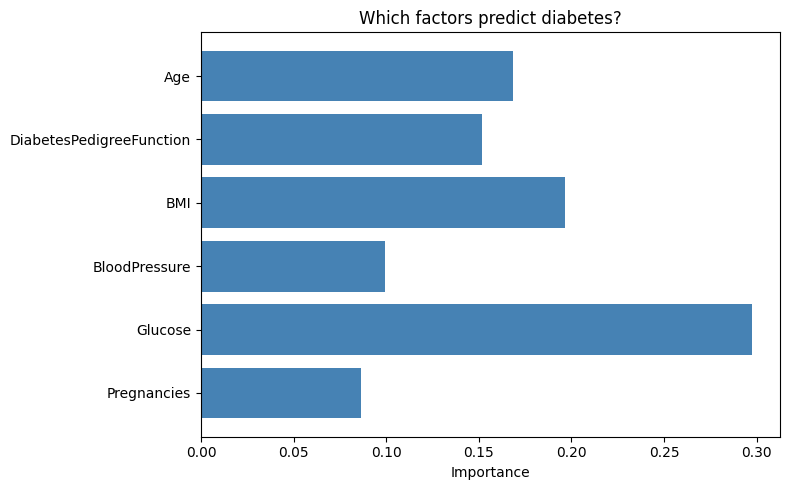

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ── Load Data ──────────────────────────────────────────────────
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

# ── Explore Data ───────────────────────────────────────────────
print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().sum())
print(df["Outcome"].value_counts())
print("Diabetes %:", round(df["Outcome"].sum() / len(df) * 100, 2), "%")

# ── Check Hidden Zeros ─────────────────────────────────────────
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zeros:
    zeros = (df[col] == 0).sum()
    print(f"{col}: {zeros} zeros")

# ── Clean Data ─────────────────────────────────────────────────
df["Glucose"] = df["Glucose"].replace(0, None)
df["BloodPressure"] = df["BloodPressure"].replace(0, None)
df["BMI"] = df["BMI"].replace(0, None)
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df = df.drop("SkinThickness", axis=1)
df = df.drop("Insulin", axis=1)

# ── Verify Clean ───────────────────────────────────────────────
print(df.isnull().sum())
print(df.shape)

# ── Split Data ─────────────────────────────────────────────────
features = ["Pregnancies", "Glucose", "BloodPressure",
            "BMI", "DiabetesPedigreeFunction", "Age"]
X = df[features]
Y = df["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# ── Train Model ────────────────────────────────────────────────
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# ── Evaluate Model ─────────────────────────────────────────────
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# ── Predict Jad ────────────────────────────────────────────────
jad = pd.DataFrame([[0, 85, 70, 22, 0.5, 20]],
                   columns=features)
result = model.predict(jad)
if result[0] == 1:
    print("Jad has diabetes 😢")
else:
    print("Jad does NOT have diabetes 🎉")

# ── Feature Importance ─────────────────────────────────────────
importance = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importance, color="steelblue")
plt.title("Which factors predict diabetes?")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()